# The Natural Scenes Dataset (NSD)

From [naturalscenesdataset.org](https://naturalscenesdataset.org):
```text
The Natural Scenes Dataset (NSD) is a large-scale fMRI dataset conducted at ultra-high-field (7T) strength at the Center of Magnetic Resonance Research (CMRR) at the University of Minnesota. The dataset consists of whole-brain, high-resolution (1.8-mm isotropic, 1.6-s sampling rate) fMRI measurements of 8 healthy adult subjects while they viewed thousands of color natural scenes over the course of 30–40 scan sessions. While viewing these images, subjects were engaged in a continuous recognition task in which they reported whether they had seen each given image at any point in the experiment. These data constitute a massive benchmark dataset for computational models of visual representation and cognition, and can support a wide range of scientific inquiry.
```

The NSD was spear-headed by Kendrick Kay at the University of Minnesota, and is one of the best datasets for examining in-depth visual function due to the large quantity of scan time for each participant.

The NSD is hosted on Amazon S3, so we will access it using the `S3Path` and `S3Client` interface of `cloudpathlib`. The NSD does not require authentication for access, so we do not need to load or name our credentials.

In [1]:
from cloudpathlib import S3Path, S3Client
from pathlib import Path

# Set up our cache path:
cache_path = Path('/home/jovyan/cache')
if not cache_path.exists():
    cache_path.mkdir()

# Create the root S3Path for the NSD:
nsd_base_path = S3Path(
    's3://natural-scenes-dataset/',
    client=S3Client(
        no_sign_request=True,
        local_cache_dir=cache_path))

Let's look around inside of the NSD S3 bucket...

In [2]:
from utils import ls, crawl

ls(nsd_base_path)

[S3Path('s3://natural-scenes-dataset/nsddata'),
 S3Path('s3://natural-scenes-dataset/nsddata_betas'),
 S3Path('s3://natural-scenes-dataset/nsddata_diffusion'),
 S3Path('s3://natural-scenes-dataset/nsddata_other'),
 S3Path('s3://natural-scenes-dataset/nsddata_rawdata'),
 S3Path('s3://natural-scenes-dataset/nsddata_stimuli'),
 S3Path('s3://natural-scenes-dataset/nsddata_timeseries'),
 S3Path('s3://natural-scenes-dataset/index.html')]

In [4]:
ls(nsd_base_path / 'nsddata' / 'freesurfer')

[S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/fsaverage'),
 S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/fsaverage3'),
 S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/fsaverage4'),
 S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/fsaverage5'),
 S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/fsaverage6'),
 S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/fsaverage_sym'),
 S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/subj01'),
 S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/subj02'),
 S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/subj03'),
 S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/subj04'),
 S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/subj05'),
 S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/subj06'),
 S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/subj07'),
 S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/subj08')]

In [8]:
ls(nsd_base_path / 'nsddata' / 'ppdata' / 'subj01' / 'func1pt8mm')

[S3Path('s3://natural-scenes-dataset/nsddata/ppdata/subj01/func1pt8mm/roi'),
 S3Path('s3://natural-scenes-dataset/nsddata/ppdata/subj01/func1pt8mm/R2.nii.gz'),
 S3Path('s3://natural-scenes-dataset/nsddata/ppdata/subj01/func1pt8mm/R2_session01.nii.gz'),
 S3Path('s3://natural-scenes-dataset/nsddata/ppdata/subj01/func1pt8mm/R2_session02.nii.gz'),
 S3Path('s3://natural-scenes-dataset/nsddata/ppdata/subj01/func1pt8mm/R2_session03.nii.gz'),
 S3Path('s3://natural-scenes-dataset/nsddata/ppdata/subj01/func1pt8mm/R2_session04.nii.gz'),
 S3Path('s3://natural-scenes-dataset/nsddata/ppdata/subj01/func1pt8mm/R2_session05.nii.gz'),
 S3Path('s3://natural-scenes-dataset/nsddata/ppdata/subj01/func1pt8mm/R2_session06.nii.gz'),
 S3Path('s3://natural-scenes-dataset/nsddata/ppdata/subj01/func1pt8mm/R2_session07.nii.gz'),
 S3Path('s3://natural-scenes-dataset/nsddata/ppdata/subj01/func1pt8mm/R2_session08.nii.gz'),
 S3Path('s3://natural-scenes-dataset/nsddata/ppdata/subj01/func1pt8mm/R2_session09.nii.gz'),
 S3

## Loading an NSD file: The Coefficient of Determination (or Variance Explained)

We can load a nifti file from the NSD using the cloudpath object, and cloudpath's ability to convert a cloudpath into a local filepath (by using `cloud_path_object.fspath`). The NSD is not in BIDS format, but its data are organized relatively intuitively. The directory `ppdata` in particular holeds the preprocessed data for the subjects. Here we will extract the coefficient of determination (also called the r-squared or the percentage of variance explained) of the population receptive field (PRF) models for subject 1.

In [32]:
import nibabel as nib

nsd_pppath = nsd_base_path / 'nsddata' / 'ppdata'
cod_filename = nsd_pppath / 'subj01' / 'func1pt8mm' / 'prf_R2.nii.gz'
cod = nib.load(cod_filename.fspath)
cod.shape

(81, 104, 83)

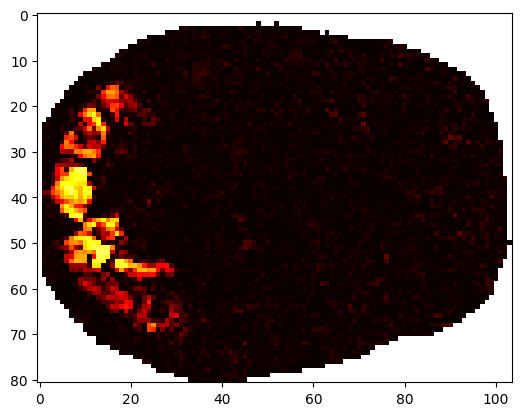

In [38]:
# Once we have loaded the CoD as a nifti object, we can plot it using matplotlib.

import matplotlib.pyplot as plt

plt.imshow(cod.dataobj[:,:,40], vmin=0, vmax=100, cmap='hot')

### Loading Subjects using neuropythy

Because the NSD is on S3, neuropythy can also access it and load FreeSurfer subjects from it. To do this, we can simply direct neuropythy to the S3 FreeSurfer subject directory (note that this will not share cache with the `cloudpathlib` library).

In [39]:
# Import neuropythy
import neuropythy as ny

# Tell neuropythy where we want to keep cache data.
ny.config['data_cache_root'] = '/home/jovyan/cache'

In [40]:
# Where is the FreeSurfer data for a subject?

ls(nsd_base_path / 'nsddata' / 'freesurfer' / 'subj01')

[S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/subj01/label'),
 S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/subj01/mri'),
 S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/subj01/scripts'),
 S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/subj01/stats'),
 S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/subj01/surf'),
 S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/subj01/tmp'),
 S3Path('s3://natural-scenes-dataset/nsddata/freesurfer/subj01/touch')]

In [41]:
# Ask neuropythy to load a FreeSurfer subject:
sub = ny.freesurfer_subject(
    's3://natural-scenes-dataset/nsddata/freesurfer/subj01')

In [ ]:
# Have neuropythy plot this subject:
ny.cortex_plot((sub.lh, sub.rh), surface='white')